<h1>База данных сервиса по чтению книг<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор" data-toc-modified-id="Обзор-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор</a></span></li><li><span><a href="#Задания" data-toc-modified-id="Задания-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Задание</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

Куплен крупный сервис по чтению книг.

**Цель исследования:** проанализировать базу данных. И сформулировать ценностные предложения для нового продукта.

**Задачи для исследования:**
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Обзор

Схема БД.

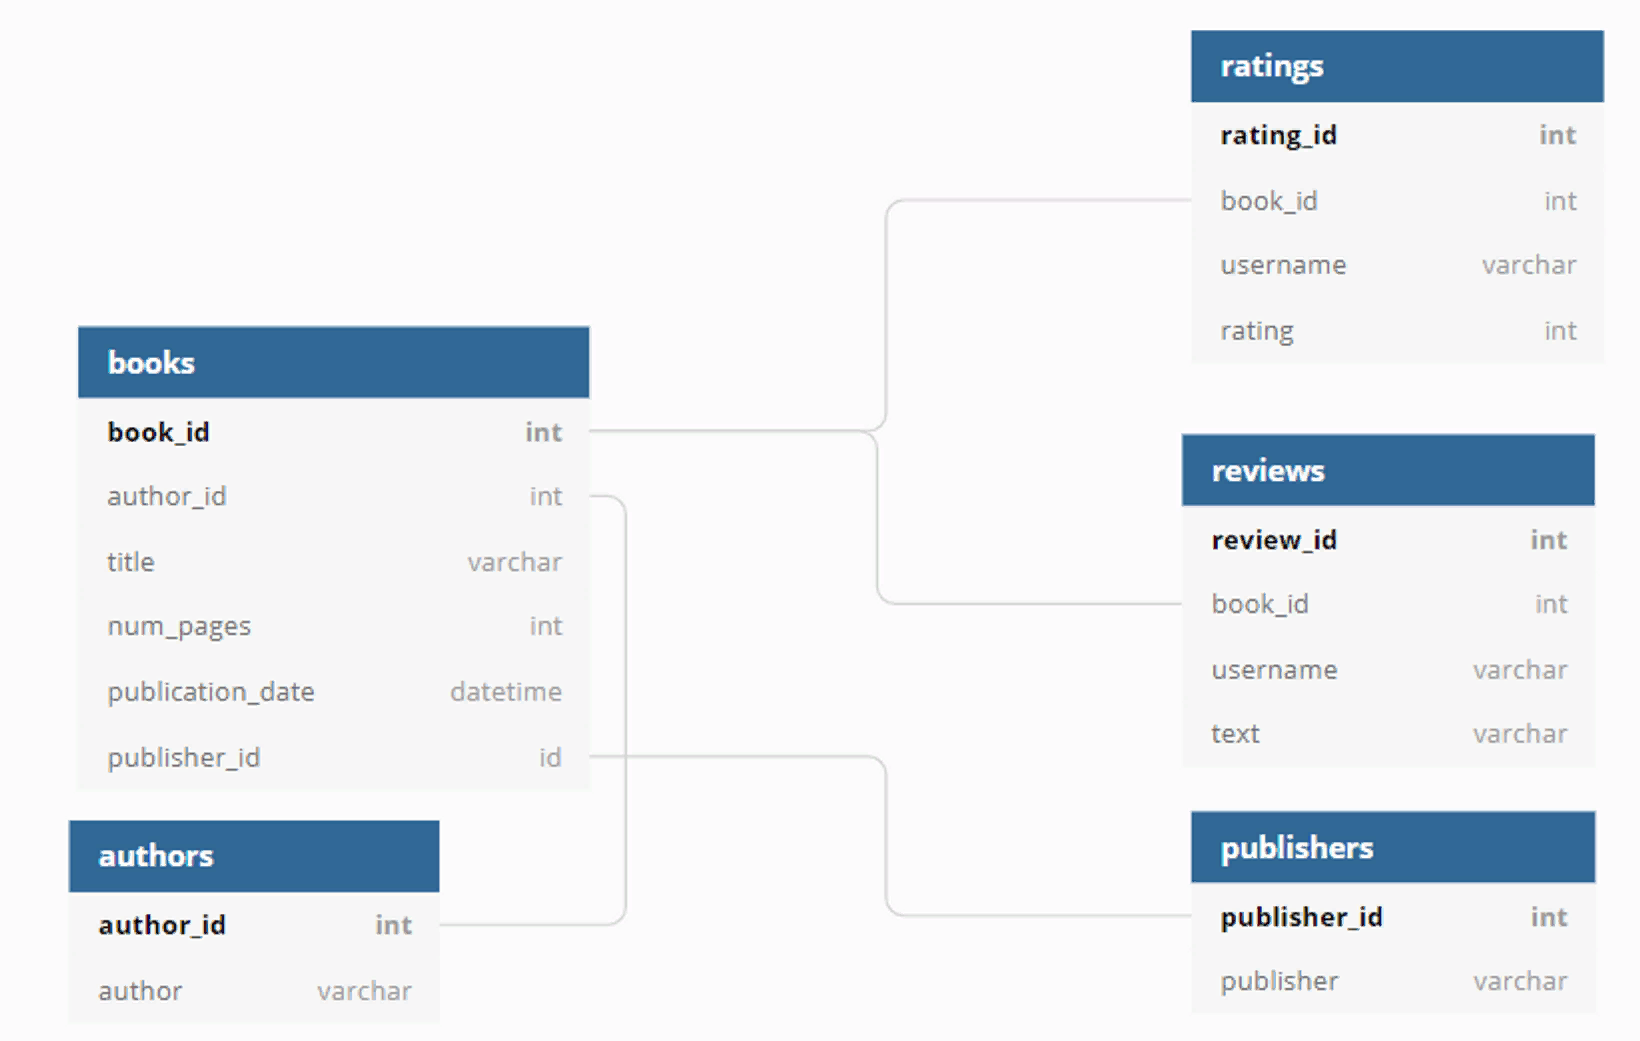

In [10]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
import warnings
warnings.filterwarnings('ignore')

In [11]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine) 

    print(f'Таблица - "{table}"')
    display(request.head())
    print(request.info(), '\n')

Таблица - "books"


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None 

Таблица - "authors"


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None 

Таблица - "publishers"


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None 

Таблица - "ratings"


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None 

Таблица - "reviews"


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None 



В таблице books столбец publication_date надо поменять тип. А остальное с данными в проядке.

In [12]:
# КОД РЕВЬЮЕРА
# какие ещё таблицы доступны в базе
display(pd.io.sql.read_sql('''

SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND
      schemaname != 'information_schema';

''', con = engine))


# смотрим на типы столбцов в интересующих таблицах
display(pd.io.sql.read_sql('''
SELECT 
    table_name, 
    column_name, 
    data_type, 
    is_nullable
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE table_name IN ('books', 'authors', 'publishers', 'ratings', 'reviews');
''', con = engine))

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,orders,praktikum_admin,None,True,False,False,False
1,public,visits,praktikum_admin,None,True,False,False,False
2,public,advertisment_costs,praktikum_admin,None,True,False,False,False
3,public,authors,praktikum_admin,None,True,False,True,False
4,public,second,praktikum_student,None,False,False,False,False
5,public,second_b,praktikum_student,None,False,False,False,False
6,public,publishers,praktikum_admin,None,True,False,True,False
7,public,author,praktikum_student,None,True,False,False,False
8,public,reviews,praktikum_admin,None,True,False,True,False
9,public,ratings,praktikum_admin,None,True,False,True,False


,table_name,column_name,data_type,is_nullable
0,authors,author_id,integer,NO
1,authors,author,text,YES
2,publishers,publisher_id,integer,NO
3,publishers,publisher,text,YES
4,reviews,review_id,integer,NO
5,reviews,book_id,integer,YES
6,reviews,username,text,YES
7,reviews,text,text,YES
8,ratings,rating_id,integer,NO
9,ratings,book_id,integer,YES


# Задания

Для проверки запишем каждую таблицу в ДатаФрейм

## Задание

Посчитайте, сколько книг вышло после 1 января 2000 года

In [13]:
query1 = ''' 
SELECT COUNT(*) 
FROM books
WHERE publication_date > '2000-1-1'; 
''' 

request1 = pd.io.sql.read_sql(query1, con = engine)
# request1

print(f'После 1 января 2000 года вышло {request1.iloc[0,0]} книг')

После 1 января 2000 года вышло 819 книг


Не так много книг, возможно пора обновить библиотеку.

## Задание

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [14]:
query2 = ''' 

SELECT 
    books.title AS book_name,
    books.book_id AS id,
    SubRev.n_rev AS reviews,
    SubRat.avg_rat AS avg_rating
FROM books LEFT JOIN 
                (SELECT
                    book_id,
                    AVG(rating) AS avg_rat
                FROM
                    ratings
                GROUP BY 
                    book_id
                ) AS SubRat ON SubRat.book_id = books.book_id
        LEFT JOIN
                (SELECT 
                    book_id,
                    COUNT(review_id) AS n_rev
                FROM
                    reviews
                GROUP BY 
                    book_id
                ) AS SubRev ON SubRev.book_id = books.book_id
ORDER BY
    avg_rating DESC                
; ''' 

request2 = pd.io.sql.read_sql(query2, con = engine)
request2

,book_name,id,reviews,avg_rating
0,Pop Goes the Weasel (Alex Cross #5),518,2.0,5.00
1,The Ghost Map: The Story of London's Most Terr...,732,2.0,5.00
2,In the Hand of the Goddess (Song of the Liones...,347,2.0,5.00
3,Tai-Pan (Asian Saga #2),610,2.0,5.00
4,How to Be a Domestic Goddess: Baking and the A...,330,1.0,5.00
...,...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,915,3.0,2.25
996,Junky,371,2.0,2.00
997,His Excellency: George Washington,316,2.0,2.00
998,Drowning Ruth,202,3.0,2.00


Книги с высоким рейтингом и/или с обзорами необходимо показывать новым пользователям, так как возможно они их не читали. Книги с низким рейтингом, чтобы стимулировать покупку делать скидку, а чтобы привлечь клиента стимулировать делать обзоры.

## Задание

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [15]:
query3 = ''' 
SELECT
    T.publisher_id,
    T.publisher,
    T.n_books
FROM
    (SELECT 
        books.publisher_id AS publisher_id,
        COUNT(books.book_id) AS n_books,
        publishers.publisher AS publisher 
    FROM 
        books 
        LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id

    WHERE 
        num_pages>50
    GROUP BY
        books.publisher_id,
        publishers.publisher
    ORDER BY 
        n_books DESC) AS T
LIMIT 1
; ''' 

request3 = pd.io.sql.read_sql(query3, con = engine)
request3

,publisher_id,publisher,n_books
0,212,Penguin Books,42


Издательство вкладывается в сложные продуманные работы, надо будет посмотреть, может появились новые книги.

## Задание

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [16]:
query4 = ''' 
SELECT 
    aut_avg.author,
    AVG(aut_avg.avg_rating) AS avg_avg_rating
FROM
        (SELECT 
            authors.author AS author
           , AVG(ratings.rating) AS avg_rating
        FROM books
            LEFT JOIN authors ON books.author_id = authors.author_id
            LEFT JOIN ratings ON books.book_id = ratings.book_id
        GROUP BY 
             books.book_id
             , authors.author_id
        HAVING
            COUNT(ratings.rating_id) >=50 
        ) AS aut_avg 
GROUP BY    
    aut_avg.author
ORDER BY
    avg_avg_rating DESC
LIMIT 5
    
; ''' 

request4 = pd.io.sql.read_sql(query4, con = engine)
request4


,author,avg_avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


Такие популярные произведения люди готовые покупать даже если читали, так что их можно рекомендовать и старым пользователям. Такж необходимо изучить рынок и найти больше таких авторов.

## Задание

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [17]:
query5 = ''' 

SELECT
    AVG(Sub.n_reviews)
FROM
    (SELECT
        username,
        COUNT(review_id) AS n_reviews
    FROM
        reviews
    WHERE 
        username IN (
                SELECT 
                    username
                FROM 
                    ratings
                GROUP BY 
                    username
                HAVING 
                    COUNT(rating_id) > 50
                    )
    GROUP BY 
        username
    ) AS Sub
; ''' 

request5 = pd.io.sql.read_sql(query5, con = engine)
request5

,avg
0,24.333333


Много обзоров не бывает, нужно стимулировать пользователей их делать. Например поощрять возможность получать эксклюзивы до старта продаж.

# Вывод

В ходе исследования проанализировать базу данных сервиса чтения книг.

Для максимизации прибыли следует ориентироваться на бестселлеры и (или) расширение предложения за счет специальзированной литературы (возможно авторских тематических публикаций)

Также стоит рассмотреть вариант расширения функционала (и предложения) за счет аудиокниг (тематических подкастов), которые пользуются популярностью у определеннной группы людей

**Рекмомендация:**
- Изучить влияние на продажи от рейтинга и количества обзоров
- Выполнить сегментацию пользователей для таргетирования